In [1]:
import sys
import copy
sys.path.insert(0, "..")
from classes.calculators.lennardjones import LennardJones
from classes.atoms import Atom_Collection, Atom
from classes.optimizers.random_struct_search import Random_Searcher
from classes.optimizers.metropol import Metropol
from classes.optimizers.md_simulator import MD_Simulator
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')
#[-1.63426085e+00,  8.76142353e+00]])
#[-2.35094530e-46,  5.00000000e+00]
# 3.09959533e-01, -1.59518204e+01]
#[ 0.00000000e+00,  5.00000000e+00],
#[ 3.09959533e-01, -1.59518204e+01]

In [2]:
points = np.array([[ 5.72764149e-01,  6.98483444e+00],
 [ 1.63426085e+00,  8.76142353e+00],
 [ 3.09507091e+00,  1.02265642e+01],
 [ 4.88144337e+00,  1.12642896e+01],
 [ 6.87528576e+00,  1.17843360e+01],
 [ 8.93121695e+00,  1.17569037e+01],
 [ 1.09132674e+01,  1.12115204e+01],
 [ 1.27107174e+01,  1.02053265e+01],
 [ 1.42278647e+01,  8.79885608e+00],
 [ 1.53329780e+01,  7.03867012e+00],
 [ 1.58683145e+01,  5.03590116e+00],
 [ 1.58444404e+01,  2.97594344e+00],
 [ 1.53167438e+01,  9.87905213e-01],
 [ 1.44072907e+01, -8.67109728e-01],
 [ 1.32285481e+01, -2.57886199e+00],
 [ 1.18058120e+01, -4.09379195e+00],
 [ 1.03171903e+01, -5.54160621e+00],
 [ 8.77186106e+00, -6.93135003e+00],
 [ 7.19201499e+00, -8.28176348e+00],
 [ 5.62844080e+00, -9.65080609e+00],
 [ 4.09406557e+00, -1.10517743e+01],
 [ 2.63317258e+00, -1.25300577e+01],
 [ 1.32272759e+00, -1.41428968e+01]])

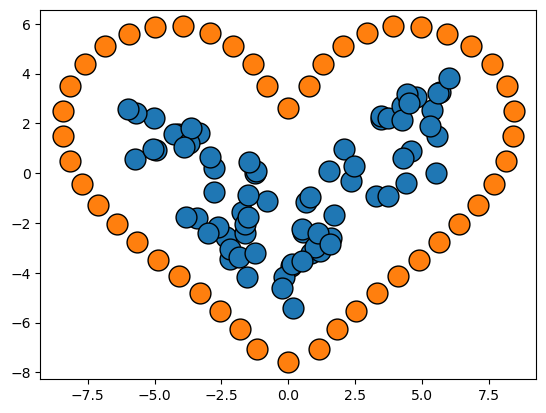

In [3]:
fig, ax = plt.subplots()
size = 15
atom_list_right = [Atom(position=np.array([pos[0]+0.5,pos[1]]), color="C1", frozen=True, size=size) for pos in points/2]
atom_list_left = [Atom(position=np.array([-pos[0]-0.5,pos[1]]), color="C1", frozen=True, size=size) for pos in points/2]
atom_list_middle = [Atom(position=np.array([0.0,-7.6]), color="C1", frozen=True, size=size)]
atom_list_middle1 = [Atom(position=np.array([0.0,2.6]), color="C1", frozen=True, size=size)]

def lin_func(x):
    return abs(x) -2.0
poses = np.zeros(shape=(75, 2))
for i in range(75):
    x = np.random.rand(1)*12.0 - 6.0
    y = lin_func(x=x) + np.random.rand(1)*5.0-4.0
    poses[i][0] = x
    poses[i][1] = y

atom_list_random = [Atom(position=pos, color="C0", size=size) for pos in poses]
atom_col = Atom_Collection(atomlist=atom_list_left+atom_list_right+atom_list_middle+atom_list_middle1+atom_list_random)
atom_col.calculator = LennardJones()
a = atom_col.plot(ax=ax)

In [4]:
struct_search = Random_Searcher(atom_col=atom_col, step_size=2.0)
atom_rel = struct_search.line_search(atom_col=atom_col)[0]

-1276.7501165194435


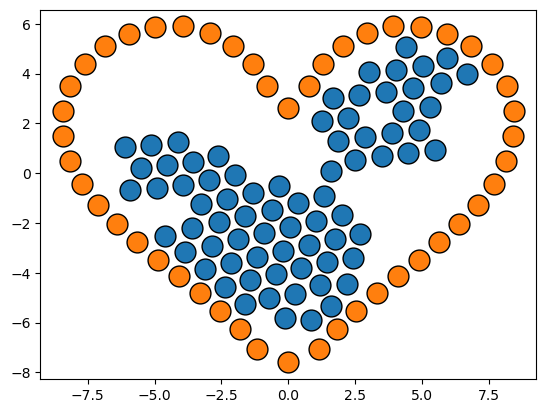

In [5]:
fig, ax = plt.subplots()
a = atom_rel.plot(ax=ax)
print(atom_rel.get_potential_energy())